In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [3]:
df = pd.read_csv("C:\\Users\\dmisb\\Downloads\\archive (8)\\emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.shape

(5172, 3002)

In [5]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [6]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5172, 3002)


In [7]:
print(df.isnull().sum())

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [8]:
# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmisb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import string
from nltk.corpus import stopwords

def process(text):
    text = str(text)  # Convert to string to handle integer inputs
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

# Assuming df is already defined somewhere in your code
df['text'].head().apply(process)


0    [0]
1    [0]
2    [0]
3    [0]
4    [0]
Name: text, dtype: object

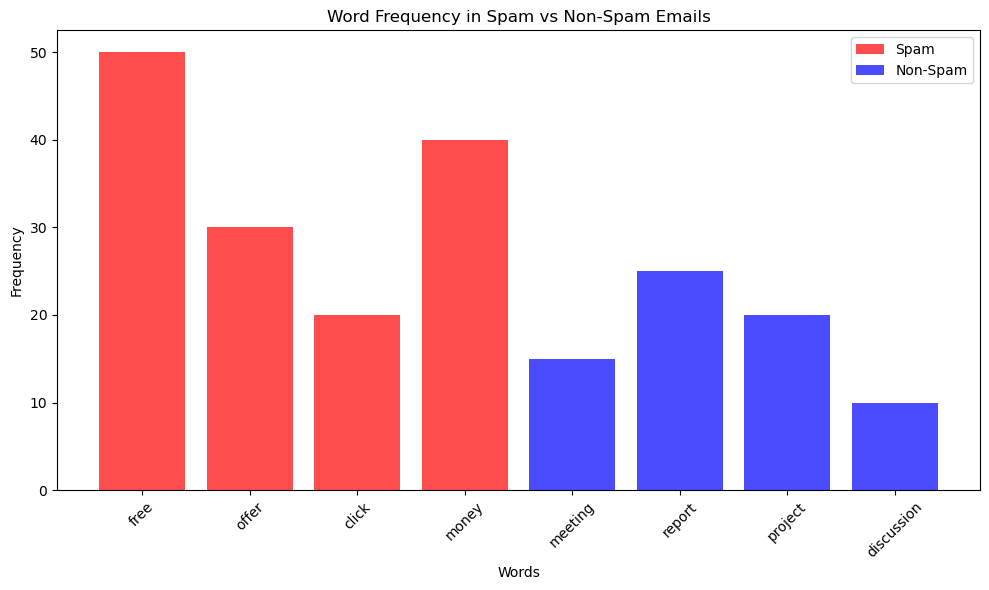

In [20]:
import matplotlib.pyplot as plt

# Example data: frequency of some words in spam and non-spam emails
spam_word_freq = {'free': 50, 'offer': 30, 'click': 20, 'money': 40}
non_spam_word_freq = {'meeting': 15, 'report': 25, 'project': 20, 'discussion': 10}

# Plotting
plt.figure(figsize=(10, 6))

# Plot spam word frequencies
plt.bar(spam_word_freq.keys(), spam_word_freq.values(), color='red', alpha=0.7, label='Spam')

# Plot non-spam word frequencies
plt.bar(non_spam_word_freq.keys(), non_spam_word_freq.values(), color='blue', alpha=0.7, label='Non-Spam')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency in Spam vs Non-Spam Emails')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(df['text'])

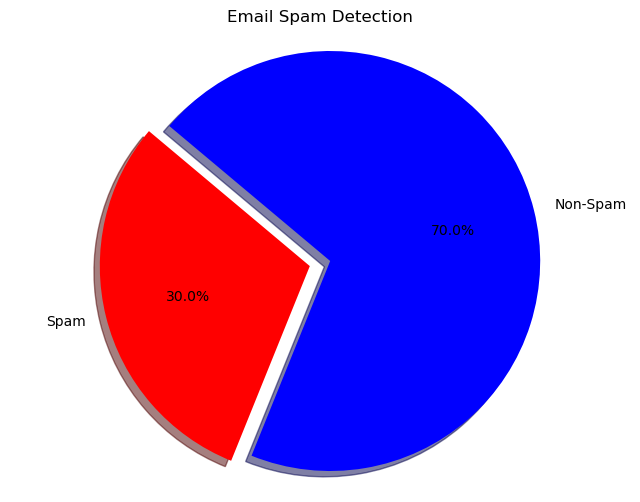

In [21]:
import matplotlib.pyplot as plt

# Example data: percentage of spam and non-spam emails
spam_percentage = 30
non_spam_percentage = 70

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Spam', 'Non-Spam'
sizes = [spam_percentage, non_spam_percentage]
colors = ['red', 'blue']
explode = (0.1, 0)  # "explode" the 1st slice (i.e., 'Spam')

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Email Spam Detection')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [14]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(message, df['spam'], test_size=0.20, random_state=0)
# To see the shape of the data
print(message.shape)

(5172, 6)


In [15]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

In [16]:
print(classifier.predict(xtrain))
print(ytrain.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 1 0 0]


In [17]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4078
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2

    accuracy                           0.99      4137
   macro avg       0.20      0.20      0.20      4137
weighted avg       0.97      0.99      0.98      4137


Confusion Matrix: 
 [[4078    0    0    0    0]
 [  49    0    0    0    0]
 [   5    0    0    0    0]
 [   3    0    0    0    0]
 [   2    0    0    0    0]]
Accuracy: 
 0.9857384578196761


C:\Users\dmisb\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmisb\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmisb\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [19]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1026
           1       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1

    accuracy                           0.99      1035
   macro avg       0.33      0.33      0.33      1035
weighted avg       0.98      0.99      0.99      1035


Confusion Matrix: 
 [[1026    0    0]
 [   8    0    0]
 [   1    0    0]]
Accuracy: 
 0.991304347826087


C:\Users\dmisb\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmisb\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmisb\.vscode\cli\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


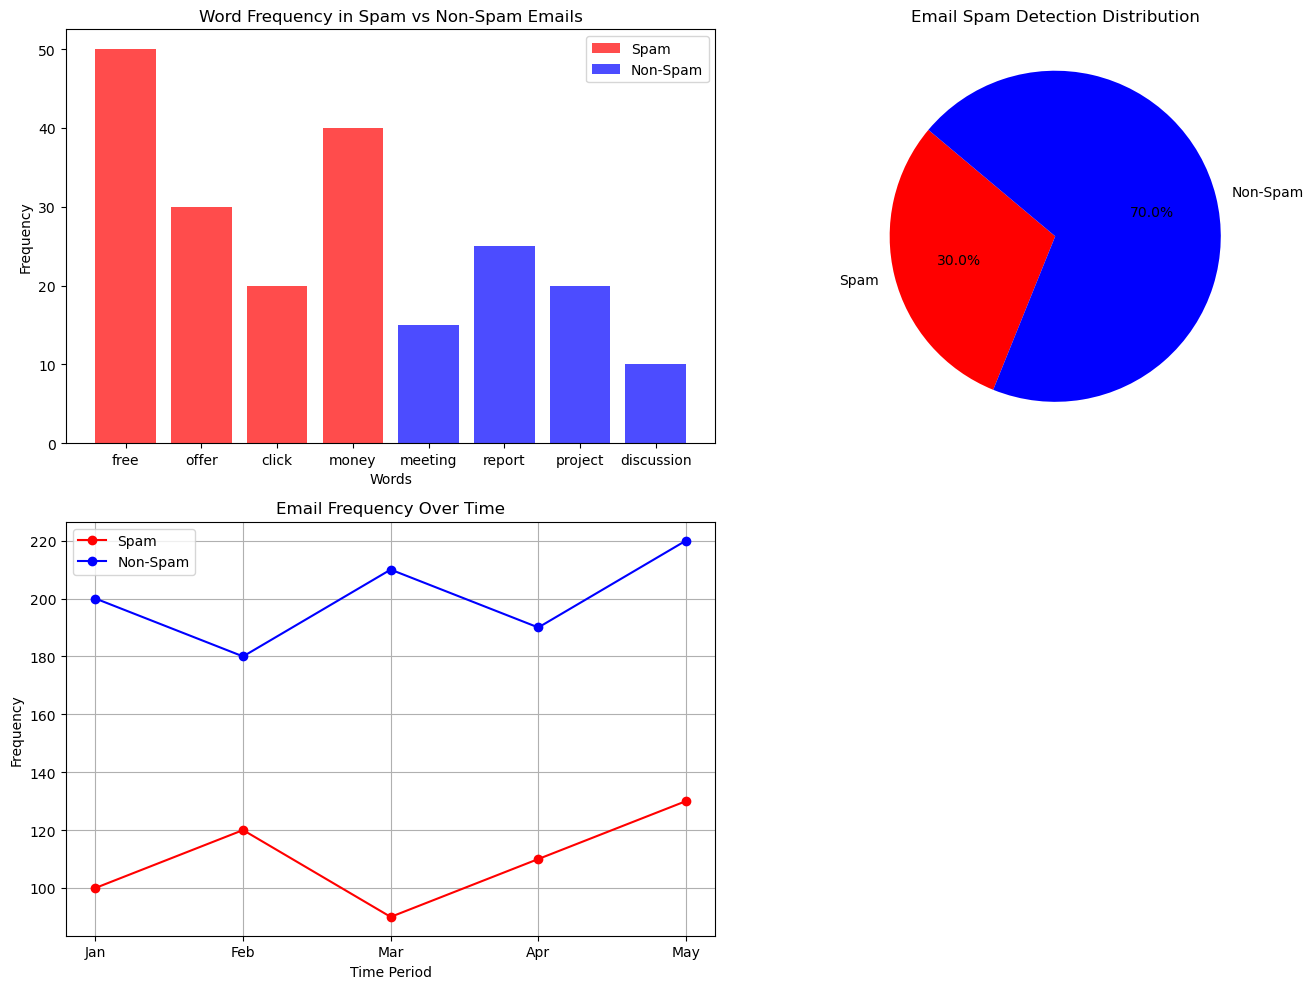

In [23]:
import matplotlib.pyplot as plt

# Example data: frequency of some words in spam and non-spam emails
spam_word_freq = {'free': 50, 'offer': 30, 'click': 20, 'money': 40}
non_spam_word_freq = {'meeting': 15, 'report': 25, 'project': 20, 'discussion': 10}

# Example data: percentage of spam and non-spam emails
spam_percentage = 30
non_spam_percentage = 70

# Example data: frequency of spam and non-spam emails over time (or any continuous variable)
time_periods = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
spam_freq = [100, 120, 90, 110, 130]
non_spam_freq = [200, 180, 210, 190, 220]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Bar plot for word frequencies
axs[0, 0].bar(spam_word_freq.keys(), spam_word_freq.values(), color='red', alpha=0.7, label='Spam')
axs[0, 0].bar(non_spam_word_freq.keys(), non_spam_word_freq.values(), color='blue', alpha=0.7, label='Non-Spam')
axs[0, 0].set_title('Word Frequency in Spam vs Non-Spam Emails')
axs[0, 0].set_xlabel('Words')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend()

# Pie chart for email distribution
axs[0, 1].pie([spam_percentage, non_spam_percentage], labels=['Spam', 'Non-Spam'], colors=['red', 'blue'], autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Email Spam Detection Distribution')

# Line graph for email frequency over time
axs[1, 0].plot(time_periods, spam_freq, marker='o', color='red', label='Spam')
axs[1, 0].plot(time_periods, non_spam_freq, marker='o', color='blue', label='Non-Spam')
axs[1, 0].set_title('Email Frequency Over Time')
axs[1, 0].set_xlabel('Time Period')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Hide the fourth subplot
fig.delaxes(axs[1,1])

plt.tight_layout()
plt.show()


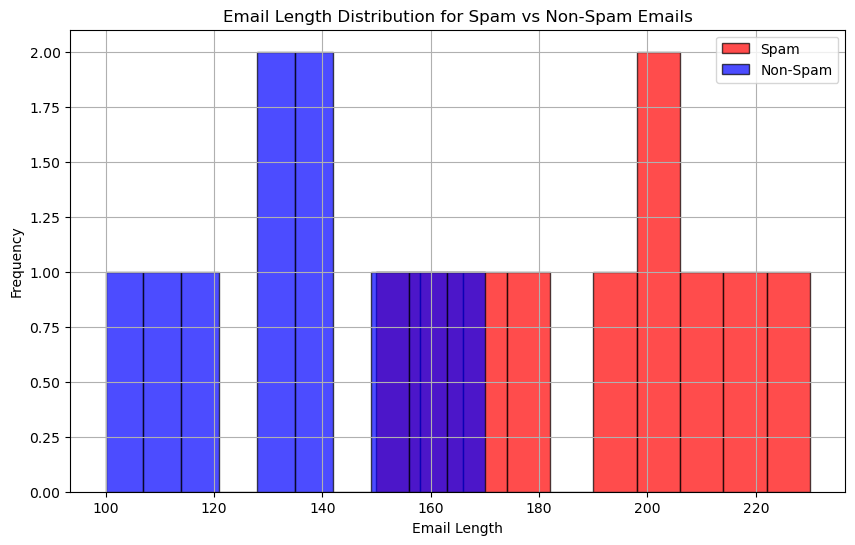

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: email lengths for spam and non-spam emails
spam_email_lengths = [150, 200, 180, 160, 190, 170, 210, 220, 200, 230]
non_spam_email_lengths = [100, 120, 110, 130, 140, 150, 140, 160, 130, 170]

# Plotting
plt.figure(figsize=(10, 6))

# Plot histogram for spam emails
plt.hist(spam_email_lengths, bins=10, color='red', alpha=0.7, label='Spam', edgecolor='black')

# Plot histogram for non-spam emails
plt.hist(non_spam_email_lengths, bins=10, color='blue', alpha=0.7, label='Non-Spam', edgecolor='black')

plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.title('Email Length Distribution for Spam vs Non-Spam Emails')
plt.legend()

plt.grid(True)
plt.show()
